汽车消费城市划分：
* 数据集：car_data.csv
* 31个省份地区，4个维度的指标（人均GDP，城镇人口比重，交通工具消费价格指数，百户拥有汽车量）

Thinking：将城市划分为几组，哪些城市会是在一组？

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('car_data.csv',encoding = 'gbk')
data.head()

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量
0,北京,8.05,86.20,95.92,37.71
1,天津,8.34,80.50,103.57,20.62
2,河北,3.39,45.60,99.03,23.32
3,山西,3.13,49.68,98.96,18.60
4,内蒙古,5.79,56.62,99.11,19.62


In [3]:
train_x = data[["人均GDP","城镇人口比重","交通工具消费价格指数","百户拥有汽车量"]]

In [4]:
min_max_scaler = MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)

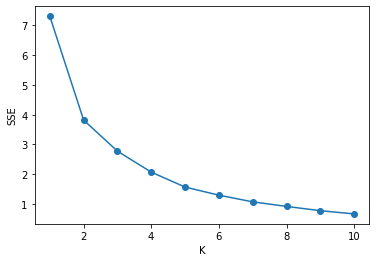

In [5]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    sse.append(kmeans.inertia_)
x = range(1,11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x,sse,'o-')
plt.show()

根据上图，选取K=4进行分析

In [6]:
K = 4

In [7]:
kmeans = KMeans(n_clusters = K)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)

In [8]:
result = pd.concat((data, pd.DataFrame(predict_y)), axis = 1)
result.rename({0:u'聚类结果'},axis = 1, inplace = True)
result.head()

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,聚类结果
0,北京,8.05,86.20,95.92,37.71,2
1,天津,8.34,80.50,103.57,20.62,0
2,河北,3.39,45.60,99.03,23.32,3
3,山西,3.13,49.68,98.96,18.60,3
4,内蒙古,5.79,56.62,99.11,19.62,2


In [9]:
result.to_excel("customer_cluster_result.xlsx",index = False)

In [10]:
for i in range(4):
    group = result[result['聚类结果']==i]['地区'].tolist()
    print('Group ',str(i),':',','.join(group))

Group  0 : 天津,上海
Group  1 : 辽宁,黑龙江,安徽,福建,江西,河南,湖北,湖南,广西,海南,重庆,四川,贵州,陕西,甘肃,青海,宁夏,新疆
Group  2 : 北京,内蒙古,江苏,浙江,山东,广东
Group  3 : 河北,山西,吉林,云南,西藏
